# Logistic Regression

In this notebook you will test your implementation of your logistic regression model, which is trained using gradient descent. Recall that a logistic regression model outputs the probability of the possitive label given the input by using a sigmoid function over a linear combination of the input variables:

$$P_{w}(y=1|x) = \sigma(\mathbf{z}), \mathbf{z}=\mathbf{x}^T\mathbf{w}$$,

where

$$\sigma(z) = \frac{1}{1+e^{-z}}$$.

Moreover, you could discretize the output of your logistic regression model by defining a threshold over the value of probability.

Recall the following to have a correct implementation:

- Crossentropy loss function:$ L = - \frac{1}{N} \sum_{i}^{N} y_{i}log(\hat{y_{i}}) + (1 - y_{i})log(1 - \hat{y_{i}})$
- Gradient of the crossentropy loss: $\nabla{L} = \frac{X^{T}(Y - \hat{Y})}{N}$


Here are a few references for logistic regression:

- [Logist Regression from Andrew Ng's course on Coursera](https://www.coursera.org/learn/machine-learning/home/week/3).
- [Section 5 of CS229 Lecture Lotes's](http://cs229.stanford.edu/notes2019fall/cs229-notes1.pdf).
- [Chapter 4 of Pattern Recognition and Machine Learning](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738).

## Setup

In [5]:
import sys

import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rc('font', family='serif')
%matplotlib inline

In [7]:
sys.path.append('..')
import utils

In [18]:
import supervised_learning.logistic_regression as lr
from supervised_learning import preprocessing
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Validate implementation

We will first do some basic tests on your implementation

**Validate sigmoid function**

In [19]:
assert lr.sigmoid(0.0) == 0.5
assert 0.62245 <= lr.sigmoid(0.5) <= 0.62246
assert 0.37754 <= lr.sigmoid(-0.5) <= 0.37755
np.testing.assert_array_almost_equal(lr.sigmoid(np.array([0, 0.5, -0.5])), np.array([0.5, 0.622459, 0.377541]))

you can also qualitatively test the implementation of the sigmoid function by ploting it and verifying that it looks as expected (S-shaped that tends to 0 on negative numbers and tends to 1 over the positives).

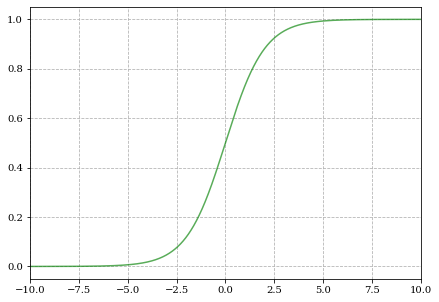

In [20]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(-10, 10)
x_axis = np.linspace(-10, 10, num=10000)
ax.plot(x_axis, lr.sigmoid(x_axis), color='g', alpha=0.65)

hope it looks good!

**Validate loss**

In [21]:
value = lr.LogisticRegression.compute_loss(np.array([1,0]), np.array([0.5, 0.5]))
assert 0.693147 <= value <= 0.6931472
value0 = lr.LogisticRegression.compute_loss(np.array([0, 0]), np.array([0.5, 0.5]))
value1 = lr.LogisticRegression.compute_loss(np.array([1, 1]), np.array([0.5, 0.5]))
assert value0 == value1

Make sure that you get the right plot as well

/Users/sebastianrodriguezcolina/personal/supervised-learning-answers/supervised_learning/logistic_regression.py:104: RuntimeWarning: divide by zero encountered in log
  loss = -1 * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
/Users/sebastianrodriguezcolina/personal/supervised-learning-answers/supervised_learning/logistic_regression.py:104: RuntimeWarning: invalid value encountered in multiply
  loss = -1 * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


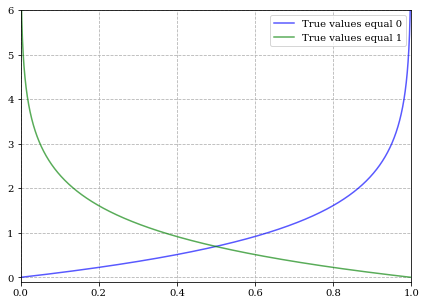

In [23]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 6)
x_axis = np.linspace(0, 1, num=10000)
loss_0 = lr.LogisticRegression.compute_loss(0, x_axis, average=False)
loss_1 = lr.LogisticRegression.compute_loss(1, x_axis, average=False)
ax.plot(x_axis, loss_0, color='b', alpha=0.65, label='True values equal 0')
ax.plot(x_axis, loss_1, color='g', alpha=0.65, label='True values equal 1')
ax.legend()

You must see that:
- When the True values are 1, the loss is zero when the model computes a probability of one and tends to infinity when it computes a probability of zero.
- When the True values are 0, the loss is zero when the model computes a probability of zero and tends to infinity when it computes a probability of one.

**Validate gradient**

In [24]:
value = lr.LogisticRegression.compute_gradient(np.array([[1,1], [1,1]]), np.array([[1], [1]]), np.array([[0.5], [0.5]]))
np.testing.assert_almost_equal(value, np.array([[-0.26894142], [-0.26894142]]), 5)

## Binary classification toy datasets

In the following we will see some toy examples of classification problems, your goal is to tune your model until you get good performance estimated quantitatively and quantitatively computing the accuracy of your predictions. This will help you gain practice in tuning your own models and also gain intuition about the limits of the logistic regression model.

*Note: you will need to implement the functions in `preprocessing.py` in order to get good performance* 


**Test Case 1**

In [26]:
X_train, y_train, X_test, y_test = utils.load_toy_dataset('../../toy_datasets/classifcation/dataset1.csv', ['x1', 'x2'])

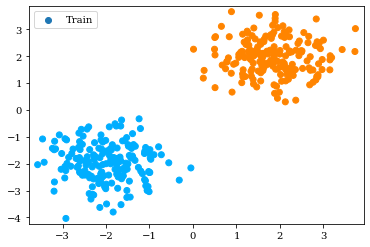

In [27]:
utils.plot_bivariate_classifcation(X_train, y_train)

Try to fit a losgistic regression to this data, use the learning curves as a way to find the right hyperparamters

In [28]:
clf = lr.LogisticRegression()
clf.fit(X_train, y_train, learning_rate=0.03, num_iterations=500)

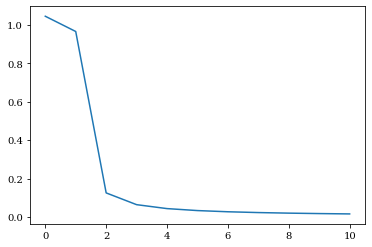

In [29]:
plt.plot(clf.learning_curves['loss'])

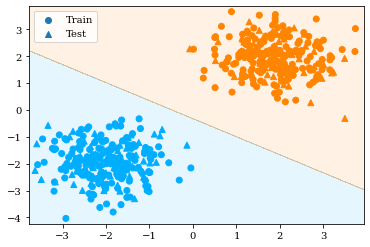

In [30]:
utils.plot_bivariate_classifcation(X_train, y_train, X_test, y_test, model_fn=lambda x: clf.predict(x, threshold=0.5))

Once you are done, try to do the same with `dataset1.1.csv`.

**Test Case 2**

In [31]:
X_train, y_train, X_test, y_test = utils.load_toy_dataset('../../toy_datasets/classifcation/dataset2.csv', ['x1', 'x2'])

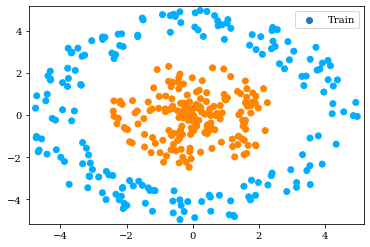

In [32]:
utils.plot_bivariate_classifcation(X_train, y_train)

In [34]:
clf = lr.LogisticRegression()
X_train_ = preprocessing.test_case2(X_train)
clf.fit(X_train_, y_train, learning_rate=0.03, num_iterations=500)

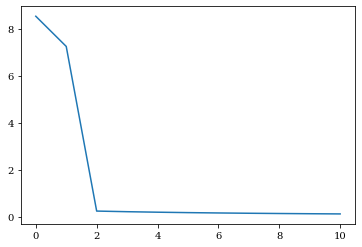

In [35]:
plt.plot(clf.learning_curves['loss'])

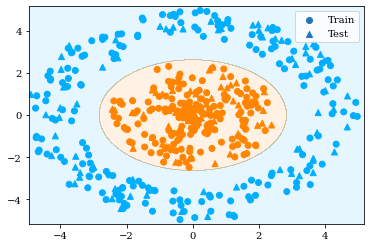

In [36]:
utils.plot_bivariate_classifcation(X_train, y_train, X_test, y_test,
   model_fn=lambda x: clf.predict(x, threshold=0.5),
   preprocessing_fn=preprocessing.test_case2)

Once you are done, try to do the same with `dataset2.1.csv`.

**Test Case 3**

In [37]:
X_train, y_train, X_test, y_test = utils.load_toy_dataset('../../toy_datasets/classifcation/dataset3.csv', ['x1', 'x2'])

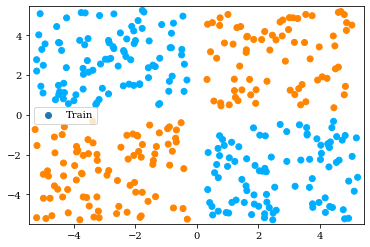

In [38]:
utils.plot_bivariate_classifcation(X_train, y_train)

In [40]:
clf = lr.LogisticRegression()
X_train_ = preprocessing.test_case3(X_train)
clf.fit(X_train_, y_train, learning_rate=0.03, num_iterations=500)

/Users/sebastianrodriguezcolina/personal/supervised-learning-answers/supervised_learning/logistic_regression.py:104: RuntimeWarning: divide by zero encountered in log
  loss = -1 * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
/Users/sebastianrodriguezcolina/personal/supervised-learning-answers/supervised_learning/logistic_regression.py:81: RuntimeWarning: invalid value encountered in double_scalars
  if abs(loss - prev_loss) <= tolerance:
/Users/sebastianrodriguezcolina/personal/supervised-learning-answers/supervised_learning/logistic_regression.py:104: RuntimeWarning: invalid value encountered in multiply
  loss = -1 * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


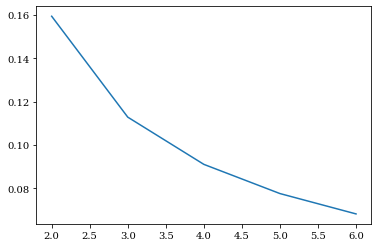

In [41]:
plt.plot(clf.learning_curves['loss'])

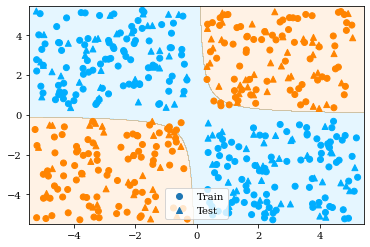

In [42]:
utils.plot_bivariate_classifcation(X_train, y_train, X_test, y_test,
   model_fn=lambda x: clf.predict(x, threshold=0.5),
   preprocessing_fn=preprocessing.test_case3)

Once you are done, try to do the same with `dataset3.1.csv`.

**Test Case 4**

In [43]:
X_train, y_train, X_test, y_test = utils.load_toy_dataset('../../toy_datasets/classifcation/dataset4.csv', ['x1', 'x2'])

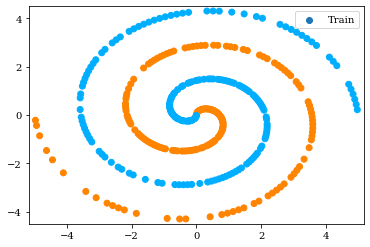

In [44]:
utils.plot_bivariate_classifcation(X_train, y_train)

In [27]:
clf = lib.LogisticRegression()
X_train_ = preprocessing.test_case4(X_train)
clf.fit(X_train_, y_train, learning_rate=0.00001, num_iterations=18000)

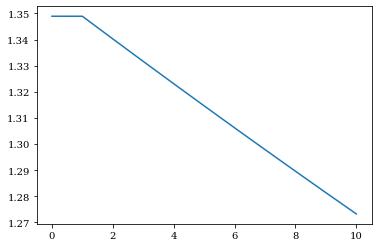

In [28]:
plt.plot(clf.learning_curves['loss'])

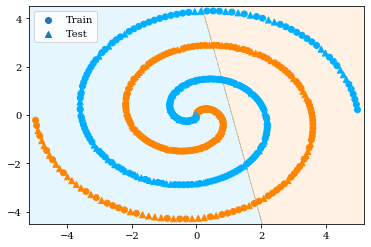

In [29]:
utils.plot_bivariate_classifcation(X_train, y_train, X_test, y_test,
   model_fn=lambda x: clf.predict(x, threshold=0.5),
   preprocessing_fn=preprocessing.test_case4)

Once you are done, try to do the same with `dataset4.1.csv`.

**Test Case 5**

In [45]:
X_train, y_train, X_test, y_test = utils.load_toy_dataset('../../toy_datasets/classifcation/dataset5.csv', ['x1', 'x2'])

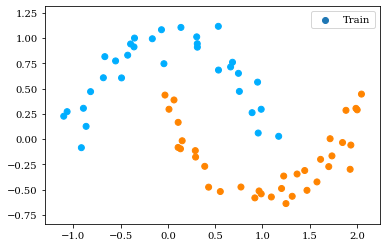

In [46]:
utils.plot_bivariate_classifcation(X_train, y_train)

In [49]:
clf = lr.LogisticRegression()
X_train_ = preprocessing.test_case5(X_train)
clf.fit(X_train_, y_train, learning_rate=0.03, num_iterations=500)

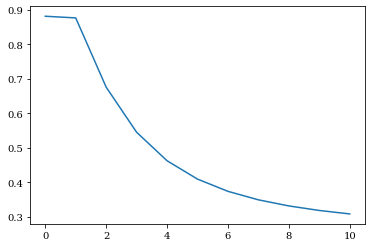

In [50]:
plt.plot(clf.learning_curves['loss'])

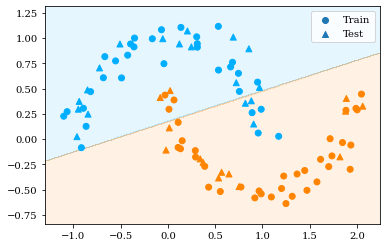

In [51]:
utils.plot_bivariate_classifcation(X_train, y_train, X_test, y_test,
   model_fn=lambda x: clf.predict(x, threshold=0.5),
   preprocessing_fn=preprocessing.test_case5)

Once you are done, try to do the same with `dataset5.1.csv`.

## Things to remember

(after completing the excercise)

- The logistic regression model separates data points by finding the probability of one of the labels given the input data.
- This separation takes the form of a line given a threshold value.
- You could also use the same technique for non-linear problems by doing some feature engineering
- When noisy data is present, do not expect your algorithms to perform perfectly